In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = pd.Series(iris.target)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
x = np.array(df.drop(columns = ['sepal_length', 'sepal_width', 'target']))
y = np.array(df.target)

In [11]:
classifier = SVC(kernel = 'linear')
classifier.fit(x, y)

SVC(kernel='linear')

In [14]:
w = classifier.coef_

In [15]:
w

array([[-1.1       , -0.7       ],
       [-0.61538458, -0.30769229],
       [-2.1829247 , -2.25365588]])

In [17]:
b = classifier.intercept_

In [18]:
b

array([ 3.27999997,  2.2923075 , 14.41486828])

In [24]:
len(w)

3

In [27]:
x1 = np.linspace(1, 7, 100)
decision_boundary = np.zeros((3, 100))
for i in range(len(w)):
    for j in range(len(x1)):
        decision_boundary[i, j] = (w[i, 0]/w[i, 1]) * x1[j] - b[i]/w[i, 1]

In [28]:
decision_boundary

array([[ 6.25714282,  6.35238091,  6.44761901,  6.5428571 ,  6.6380952 ,
         6.73333329,  6.82857139,  6.92380948,  7.01904758,  7.11428567,
         7.20952377,  7.30476186,  7.39999996,  7.49523805,  7.59047615,
         7.68571424,  7.78095234,  7.87619044,  7.97142853,  8.06666663,
         8.16190472,  8.25714282,  8.35238091,  8.44761901,  8.5428571 ,
         8.6380952 ,  8.73333329,  8.82857139,  8.92380948,  9.01904758,
         9.11428567,  9.20952377,  9.30476186,  9.39999996,  9.49523805,
         9.59047615,  9.68571424,  9.78095234,  9.87619044,  9.97142853,
        10.06666663, 10.16190472, 10.25714282, 10.35238091, 10.44761901,
        10.5428571 , 10.6380952 , 10.73333329, 10.82857139, 10.92380948,
        11.01904758, 11.11428567, 11.20952377, 11.30476186, 11.39999996,
        11.49523805, 11.59047615, 11.68571424, 11.78095234, 11.87619044,
        11.97142853, 12.06666663, 12.16190472, 12.25714282, 12.35238091,
        12.44761901, 12.5428571 , 12.6380952 , 12.7

In [ ]:
margin = 1/

In [29]:
classifier.support_vectors_

array([[1.9, 0.4],
       [4.7, 1.4],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.8, 1.4],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [3. , 1.1],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

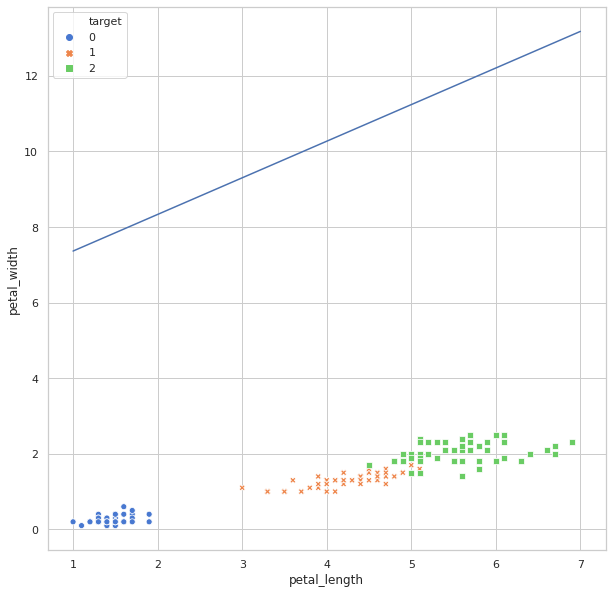

In [33]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = df.petal_length, y = df.petal_width, hue = df.target, style = df.target, palette = 'muted')
ax.plot(x1, decision_boundary[2])